# PostProcess to compare models ad configs walls $p$

In [9]:
from os.path import join as pjoin

import numpy as nm
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 200 # bigger figures, yayy!



In [10]:
from load_surface_data import load_cases, load_raw_postdata

In [11]:
configurations = ["ke_model/inlet/testCase01",
                  "ke_model/walls/testCase00",
                  "ke_model/steadyCase",
                  "ko_model/base",                  
                 ]

# $p$ at last time

In [12]:
time = "last"

In [13]:
datas = []

for conf in configurations:
    datas.append(load_raw_postdata(conf, time))
n_cases = len(datas)

['ke_model/inlet/testCase01/postProcessing/surfaces/0.174', 'ke_model/inlet/testCase01/postProcessing/surfaces/0.12', 'ke_model/inlet/testCase01/postProcessing/surfaces/0.276', 'ke_model/inlet/testCase01/postProcessing/surfaces/0.084', 'ke_model/inlet/testCase01/postProcessing/surfaces/0.162', 'ke_model/inlet/testCase01/postProcessing/surfaces/0.006', 'ke_model/inlet/testCase01/postProcessing/surfaces/0.108', 'ke_model/inlet/testCase01/postProcessing/surfaces/0.144', 'ke_model/inlet/testCase01/postProcessing/surfaces/0.258', 'ke_model/inlet/testCase01/postProcessing/surfaces/0.204', 'ke_model/inlet/testCase01/postProcessing/surfaces/0.066', 'ke_model/inlet/testCase01/postProcessing/surfaces/0.252', 'ke_model/inlet/testCase01/postProcessing/surfaces/0.042', 'ke_model/inlet/testCase01/postProcessing/surfaces/0.102', 'ke_model/inlet/testCase01/postProcessing/surfaces/0.132', 'ke_model/inlet/testCase01/postProcessing/surfaces/0.096', 'ke_model/inlet/testCase01/postProcessing/surfaces/0.114

In [ ]:
parameter = nm.fromfile(pjoin(model, "inlet/epsilons.txt"), sep=";")
nus = nm.fromfile(pjoin(model, "inlet/nus.txt"), sep=";")

In [ ]:
#epsilons = nm.linspace(0, 3, 13)

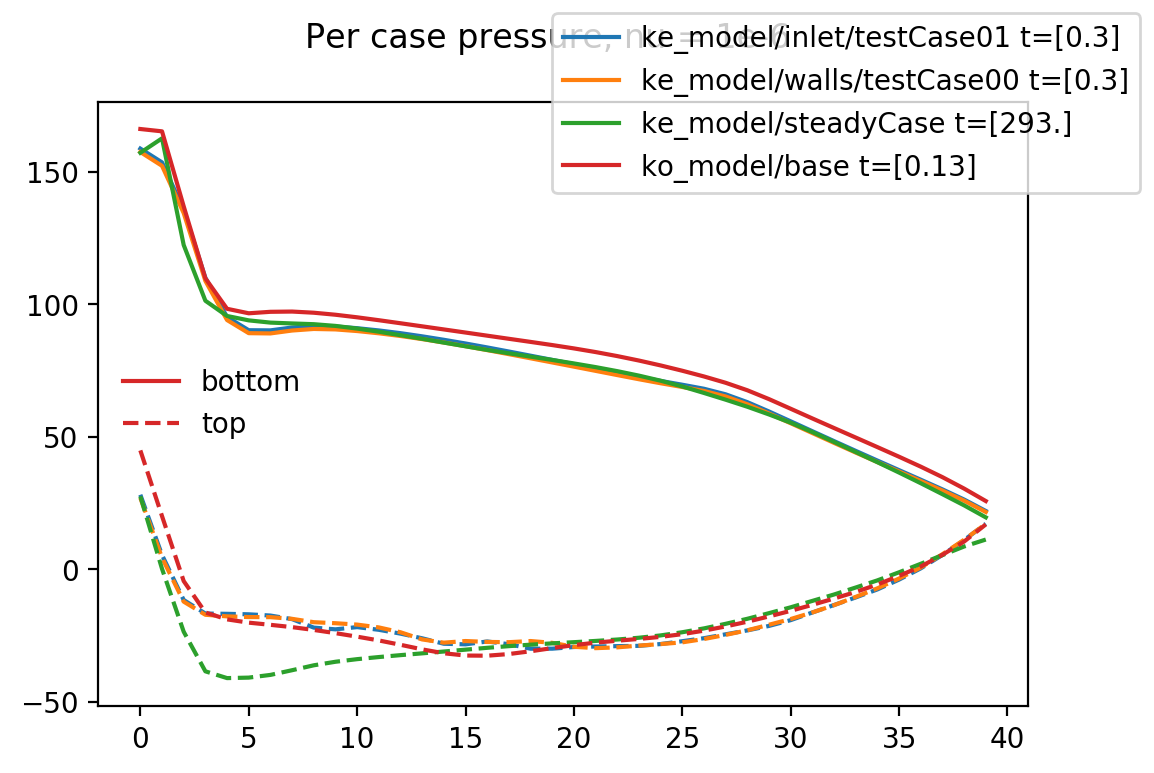

In [17]:
fig, ax = plt.subplots()
fig.suptitle("Per case pressure, nu = 1e-6")

for name, case in zip(configurations, datas):
    p_top = case[0]
    p_bot = case[1]
    t = case[2]
    top = ax.plot(nm.arange(p_top.shape[1]), p_top[-1], "--")
    bot = ax.plot(nm.arange(p_bot.shape[1]), p_bot[-1],
            color=top[0].get_color(),
             label="{} t={}".format(name, t))
from matplotlib.legend import Legend
lb = Legend(ax, [bot[0], top[0]], ['bottom', "top"],
             loc='center left', frameon=False)
ax.add_artist(lb)
fig.legend()

In [ ]:
fig, ax = plt.subplots()
fig.suptitle("Per case pressure nu = 1e-5")

for n in range(n_cases):
    if nus[n] < 1e-5 or float(times[n][-1]) < 0.3:
        continue
    top = ax.plot(nm.arange(p_top[n].shape[1]), p_top[n][-1, :], "--")
    bot = ax.plot(nm.arange(p_bot[n].shape[1]), p_bot[n][-1, :],
            color=top[0].get_color(),
             label="e= {} t={}".format(parameter[n], times[n][-1]))
from matplotlib.legend import Legend
lb = Legend(ax, [bot[0], top[0]], ['bottom', "top"],
             loc='upper center', frameon=False)
ax.add_artist(lb)
fig.legend()

# $p$ at $t=.132$

In [ ]:
time = "all"
model = "ke_model"
case_form = "inlet/*[Cc]ase**" # "*[Cc]ase_nowf[1-9]**"

In [ ]:
p_top, p_bot, times = load_cases(model, case_form, time) 
n_cases = len(p_top)

In [ ]:
fig, ax = plt.subplots()
fig.suptitle("Per case pressure, nu = 1e-6")
time_n = times == .132
for n in range(n_cases):
    
    if nus[n] > 1e-6 or float(times[n][-1]) < 0.132:
        continue
    time_mask = times[n] == .132
    top = ax.plot(nm.arange(p_top[n].shape[1]), p_top[n][time_mask][0], "--")
    bot = ax.plot(nm.arange(p_bot[n].shape[1]), p_bot[n][time_mask][0],
            color=top[0].get_color(),
             label="e= {} t={}".format(parameter[n], times[n][time_mask][0]))
from matplotlib.legend import Legend
lb = Legend(ax, [bot[0], top[0]], ['bottom', "top"],
             loc='upper center', frameon=False)
ax.add_artist(lb)
fig.legend()

In [ ]:
fig, ax = plt.subplots()
fig.suptitle("Per case pressure, nu = 1e-5")
time_n = times == .132
for n in range(n_cases):
    
    if nus[n] < 1e-5 or float(times[n][-1]) < 0.132:
        continue
    time_mask = times[n] == .132
    top = ax.plot(nm.arange(p_top[n].shape[1]), p_top[n][time_mask][0], "--")
    bot = ax.plot(nm.arange(p_bot[n].shape[1]), p_bot[n][time_mask][0],
            color=top[0].get_color(),
             label="e= {} t={}".format(parameter[n], times[n][time_mask][0]))
from matplotlib.legend import Legend
lb = Legend(ax, [bot[0], top[0]], ['bottom', "top"],
             loc='upper center', frameon=False)
ax.add_artist(lb)
fig.legend()

In [ ]:
nus